In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/amulya/Desktop/Capstone/DSCI-601-Amy/ProjectCode/Data Pipelines/Cleaned_AAPL.csv', parse_dates=['date'])


In [3]:
data['Price_Change'] = data['RET']

In [4]:
lookback_period = 14
# typically 14 days for rsi 

In [5]:
data['Gain'] = np.where(data['Price_Change'] > 0, data['Price_Change'], 0)
data['Loss'] = np.where(data['Price_Change'] < 0, abs(data['Price_Change']), 0)

In [6]:
# rolling avg for gain and loss
data['Avg_Gain'] = data['Gain'].rolling(window=lookback_period, min_periods=1).mean()
data['Avg_Loss'] = data['Loss'].rolling(window=lookback_period, min_periods=1).mean()


In [7]:
# Calculate Relative Strength (RS)
data['RS'] = data['Avg_Gain'] / data['Avg_Loss']

In [8]:
# calc usign formula : RSI = 100 - (100 / (1 + RS))
data['RSI'] = 100 - (100 / (1 + data['RS']))

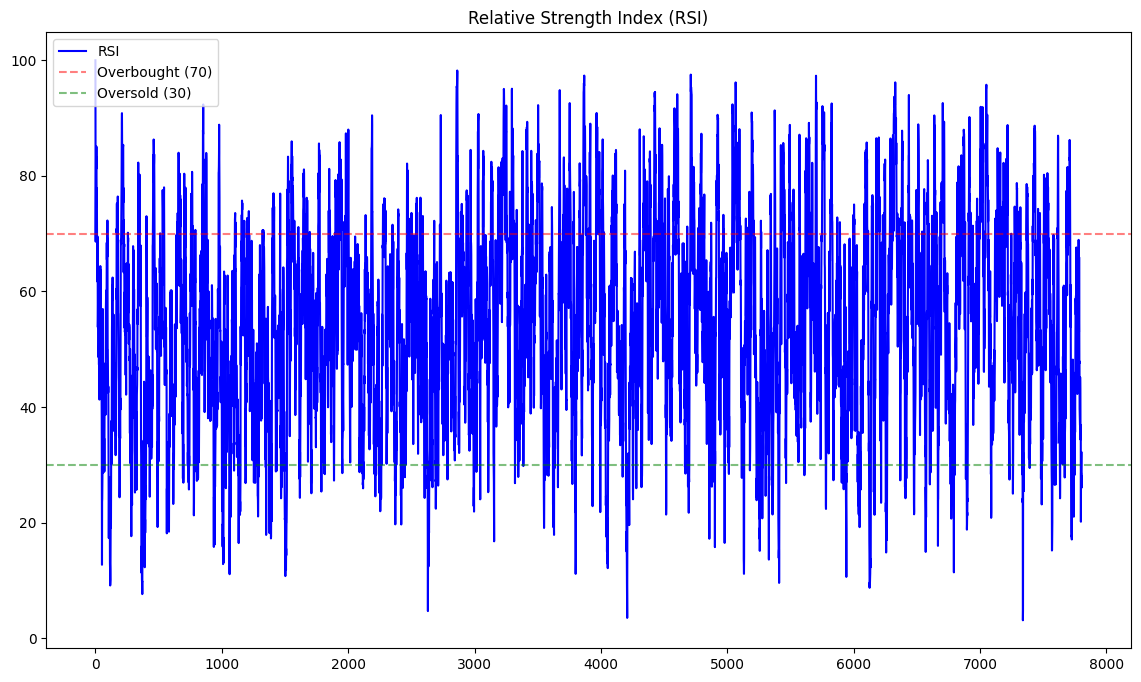

In [9]:
plt.figure(figsize=(14, 8))
plt.plot(data['RSI'], label='RSI', color='b')
plt.axhline(70, linestyle='--', alpha=0.5, color='r', label='Overbought (70)')
plt.axhline(30, linestyle='--', alpha=0.5, color='g', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.legend(loc='best')
plt.show()


In [10]:
print(data[['RSI']].head(20))

           RSI
0   100.000000
1    86.836375
2    68.617548
3    74.693804
4    79.461588
5    83.360790
6    83.360790
7    81.219985
8    85.069801
9    78.854509
10   74.697010
11   77.848685
12   74.477424
13   63.767666
14   61.737284
15   65.436086
16   69.517477
17   66.836480
18   65.347930
19   53.823825


In [14]:
overbought_data = data[data['RSI'] > 70]
oversold_data = data[data['RSI'] < 30]

overbought_oversold_data = pd.concat([overbought_data, oversold_data])


In [13]:
# Display the overbought and oversold data
overbought_oversold_data

,date,RET,VOL_CHANGE,BA_SPREAD,ILLIQUIDITY,sprtrn,TURNOVER,DJI_Return,Price_Change,Gain,Loss,Avg_Gain,Avg_Loss,RS,RSI
0,1992-01-02,0.055432,0.717745,0.008403,4.510000e-10,0.000408,17.419850,0.000000,0.055432,0.055432,0.000000,0.055432,0.000000,inf,100.000000
1,1992-01-03,-0.008403,-0.172890,0.004237,-8.340000e-11,0.004985,14.408127,0.009173,-0.008403,0.000000,0.008403,0.027716,0.004202,6.596692,86.836375
3,1992-01-07,0.019397,0.237283,0.004228,2.590000e-10,-0.001340,10.702726,0.001469,0.019397,0.019397,0.000000,0.018707,0.006338,2.951601,74.693804
4,1992-01-08,0.023256,0.645321,0.004132,1.840000e-10,0.001677,17.609419,-0.000281,0.023256,0.023256,0.000000,0.019617,0.005070,3.868926,79.461588
5,1992-01-09,0.028926,-0.104730,0.008032,2.490000e-10,-0.001172,15.765178,0.001748,0.028926,0.028926,0.000000,0.021169,0.004225,5.009901,83.360790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,2022-12-21,0.023809,0.106232,0.000221,2.050000e-12,0.014868,5.397705,0.016035,0.023809,0.023809,0.000000,0.004222,0.010525,0.401175,28.631349
7800,2022-12-22,-0.023773,-0.092628,0.000227,-2.310000e-12,-0.014452,4.897729,-0.010456,-0.023773,0.000000,0.023773,0.004222,0.011982,0.352385,26.056562
7801,2022-12-23,-0.002798,-0.181476,0.000076,-3.330000e-13,0.005868,4.008909,0.005342,-0.002798,0.000000,0.002798,0.004222,0.011612,0.363624,26.666005
7802,2022-12-27,-0.013878,0.081093,0.000231,-1.550000e-12,-0.004050,4.334004,0.001133,-0.013878,0.000000,0.013878,0.004222,0.010791,0.391284,28.123944


-- additional things to implement

- RSI with moving averages
- RSI as a trend filter
- RSI based stop loss


	Buy Signal:
	•	RSI is below 30 (oversold), AND
	•	The short-term moving average crosses above the long-term moving average (bullish crossover).
	Sell Signal:
	•	RSI is above 70 (overbought), AND
	•	The short-term moving average crosses below the long-term moving average (bearish crossover).